<a href="https://colab.research.google.com/github/gabrielcgo/modulo2_projeto2_finalizado/blob/main/modulo2_projeto2_finalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

O objetivo dessa análise é tentar criar um modelo que possa prever se determinados resultados do exame de sangue podem indicar a presença de cancer de mama nas pessoas. Os dados são compostos por 116 entradas, isto é, dados de 116 pessoas, tendo como variáveis os resultados positivos e negativos para cancer, 7 resultados laboratoriais, a idade e o IMC de cada um, não tendo dados faltantes. Para saber se a predição é confiável, será analisado a quantidade de falsos e verdadeiros positivos e negativos.

# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Aparentemente algumas variáveis obtidas pelo exame de sangue podem ajudar a prever se a pessoa tem ou não tem cancer de mama, e no modelo à seguir vamos analisar quais seriam essas variáveis, quais tem o maior peso e qual o nosso nível de acertos e erros para nossa predição. Se esse modelo obter um bom resultado, ele pode ser usado para auxiliar no diagnóstico precoce da doença.

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

In [1]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [4]:
df.shape #Aqui vemos que tem 116 linhas e 10 variáveis nesse dataset.

df.info() #Aqui vemos que não temos variáveis null e que nem todos os números são Float.

# Não temos dados faltantes, mas por segurança deve-se fazer:

df = df.replace({'?': np.nan})
df = df.dropna()

df = df.astype(float) #Defini todas as variáveis como float.
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB
Age               float64
BMI               float64
Glucose           float64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification    float64
dtype: object


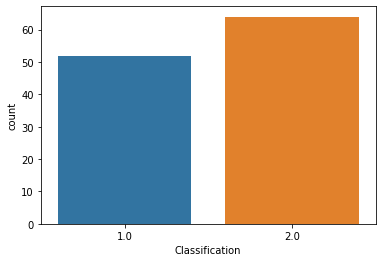

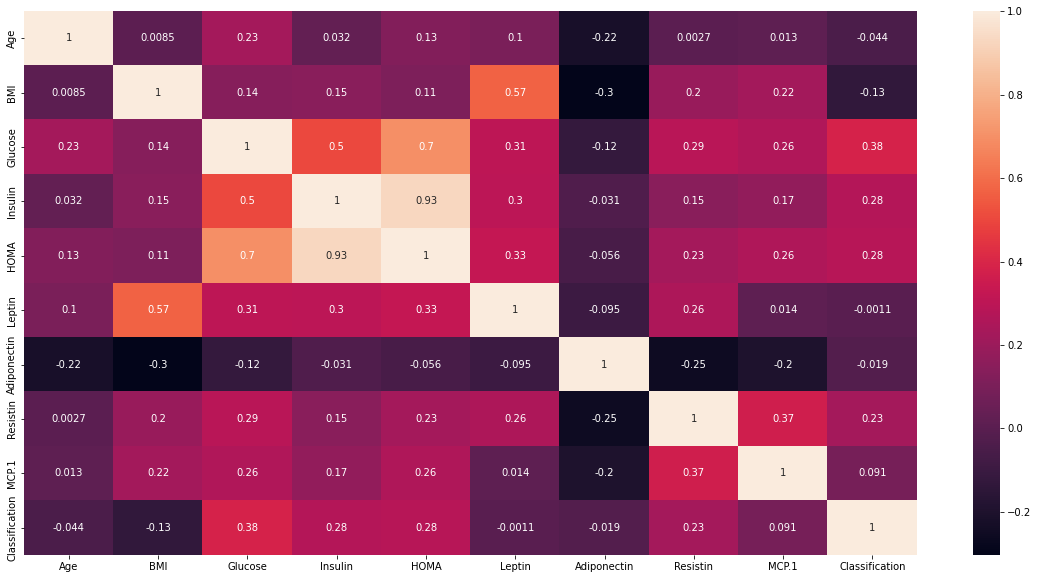

In [5]:
#Comecei analisando se o grupo de controle está baçanceado com o grupo paciente.

sns.countplot(data=df, x ='Classification')

#Estão balanceados, pois não há discrepância de valores... Agora vamos ver se existem correlações visíveis.

plt.figure(figsize=(20,10)) #Tamanho do quadro, maior para melhor visualizar.
sns.heatmap(data=df.corr(), annot=True, )

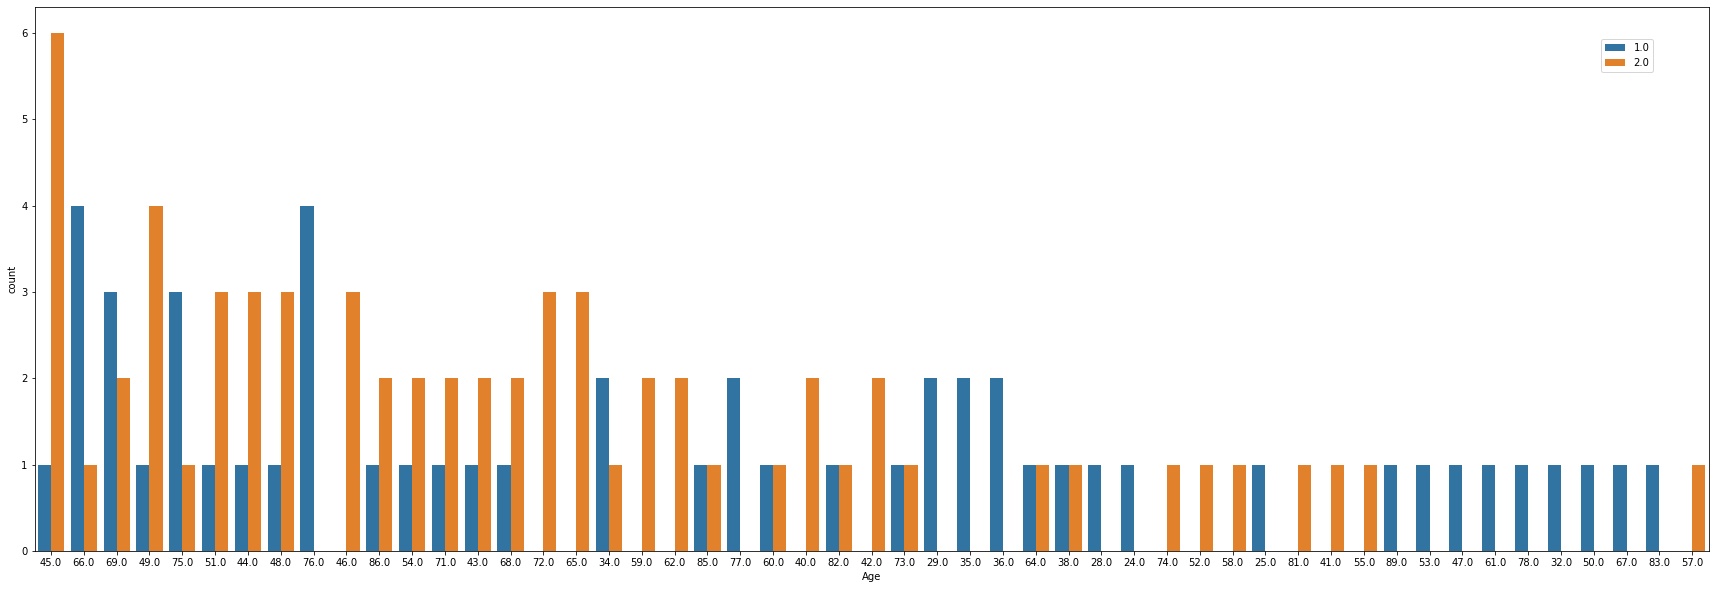

In [6]:
# Podemos ver que existem algumas correlações como: HOMA (Resistência a Insulina) com o nível de Insulina e Glicose.
# Ou também com o IMC (BMI) e o nível de Leptin (Leptina), aparentemente uma correlação média...
# Vamos explorar mais tarde se essas variáveis fazem diferença no resultado positivo para Cancer de Mama.

# Agora vamos ter uma ideia de como os diagnósticos estão distribuídos por idade:
plt.figure(figsize=(30,10))
sns.countplot(x="Age", hue="Classification", data=df, order=df.Age.value_counts().index)
plt.legend(bbox_to_anchor=(0.97, 0.95)) # A caixa da legenda estava acima da barra, posicionei ela do outro lado.

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

1. Existem mais pacientes com cancer do que sem. A linha da Adiponectina está mais escura que as outras (No mapa de calor). O Gráfico (Ano vs Classificação) ficou confuso, tem muitas barras.

2. É realmente possível detectar cancer de mama só com esses dados? Isso seria clinicamente viável? São todos esses exames que serão calculados (juntos) ou será feito um por um?

3. "Não entendi esse gráfico de calor." "Poderia ter um gráfico mais explicativo, ou talvez uma explicação para esses que você usou."

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Após o feedback, percebi que estava indo pra um lado mais técnico, talvez por querer fazer algo mais elaborado... O que eu mudaria? Bom, colocarei legendas em alguns gráficos e colocarei de uma forma mais explicativa, mostrando a relação de cada variável vs Classificação, assim fica menos confuso que o mapa de calor.

Apresente suas nova(s) visualização(ões) a partir do feedback:

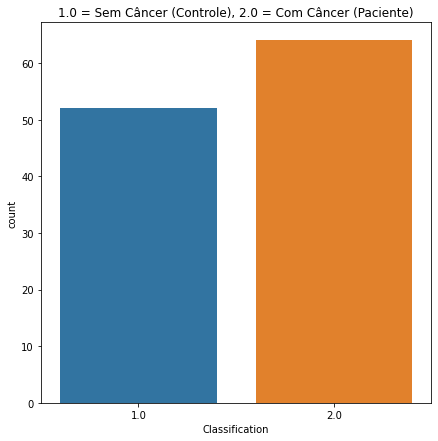

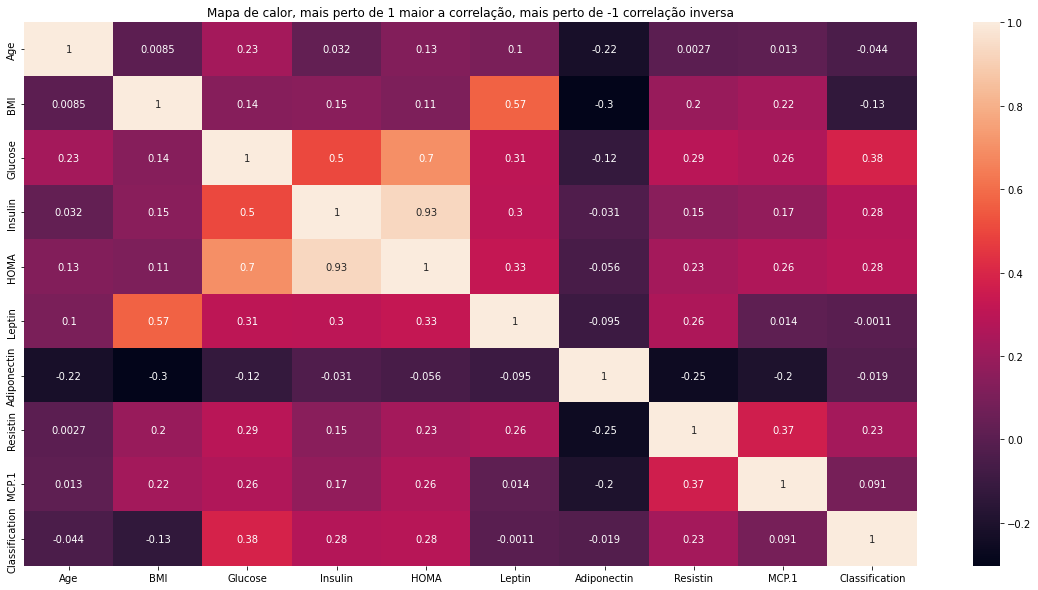

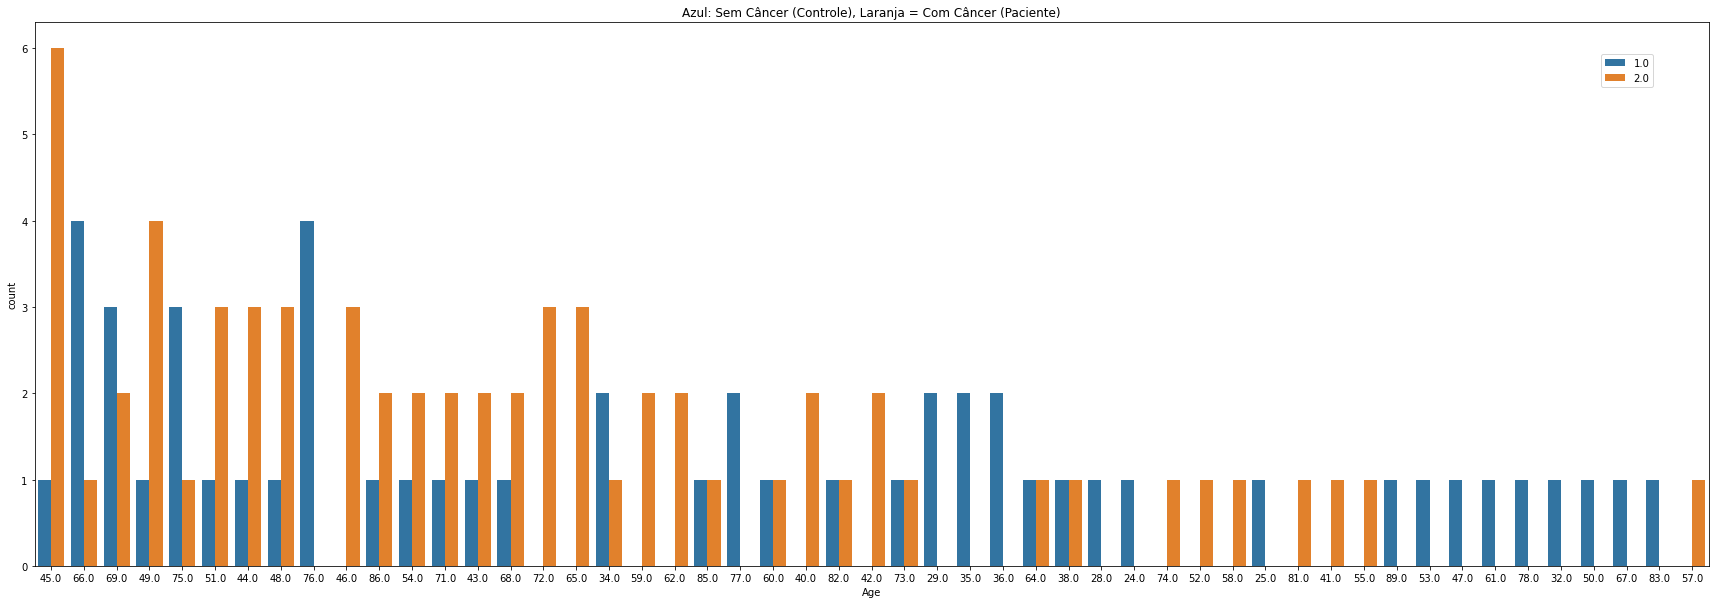

In [7]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('1.0 = Sem Câncer (Controle), 2.0 = Com Câncer (Paciente)') # Coloquei legenda
sns.countplot(data=df, x ='Classification')

plt.figure(figsize=(20,10))
plt.title('Mapa de calor, mais perto de 1 maior a correlação, mais perto de -1 correlação inversa') # Legendei
sns.heatmap(data=df.corr(), annot=True, )

plt.figure(figsize=(30,10))
plt.title('Azul: Sem Câncer (Controle), Laranja = Com Câncer (Paciente)')
sns.countplot(x="Age", hue="Classification", data=df, order=df.Age.value_counts().index)
plt.legend(bbox_to_anchor=(0.97, 0.95))

In [8]:
# Adicionei mais gráficos para fazer a comparação entre as variáveis e ficar mais visível as correlações:

IDADE X CLASSIFICAÇÃO

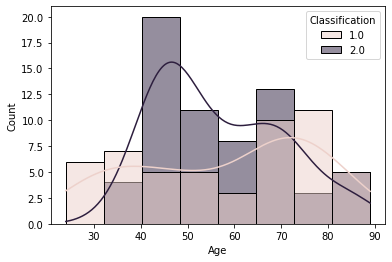

In [9]:
sns.histplot(data=df, x='Age', hue='Classification', kde=True)

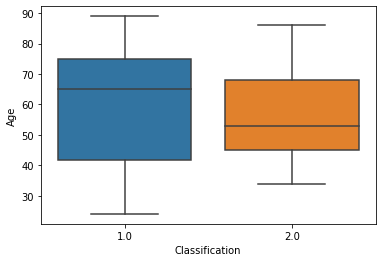

In [10]:
sns.boxplot(data=df, y='Age', x='Classification')

IMC X CLASSIFICAÇÃO

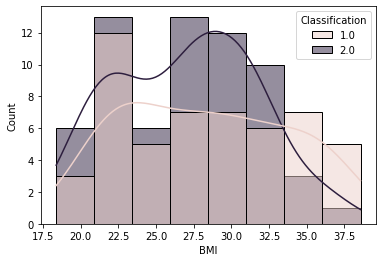

In [11]:
sns.histplot(data=df, x='BMI', hue='Classification', kde=True)

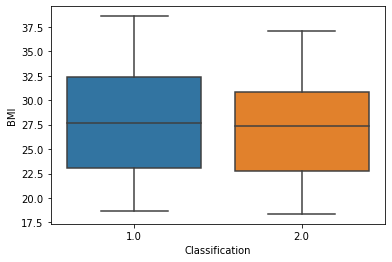

In [12]:
sns.boxplot(data=df, y='BMI', x='Classification')

GLICOSE X CLASSIFICAÇÃO

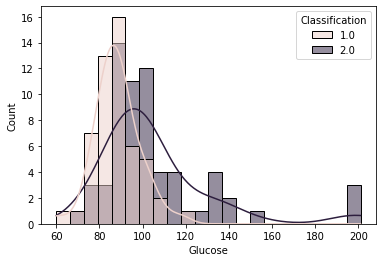

In [13]:
sns.histplot(data=df, x='Glucose', hue='Classification', kde=True)

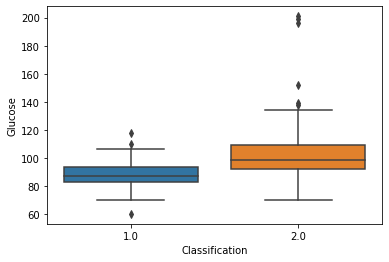

In [14]:
sns.boxplot(data=df, y='Glucose', x='Classification')

INSULINA X CLASSIFICAÇÃO

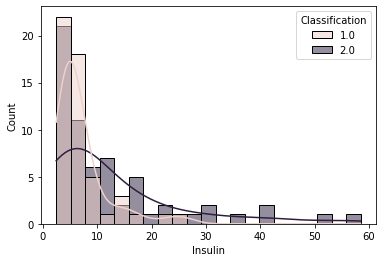

In [15]:
sns.histplot(data=df, x='Insulin', hue='Classification', kde=True)

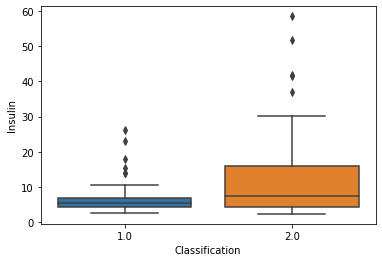

In [16]:
sns.boxplot(data=df, y='Insulin', x='Classification')

HOMA x CLASSIFICAÇÃO

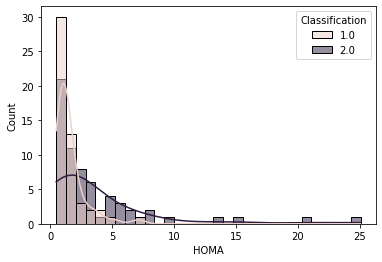

In [17]:
sns.histplot(data=df, x='HOMA', hue='Classification', kde=True)

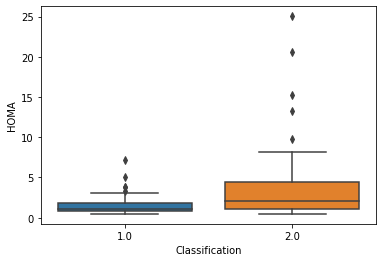

In [18]:
sns.boxplot(data=df, y='HOMA', x='Classification')

LEPTINA X CLASSIFICAÇÃO

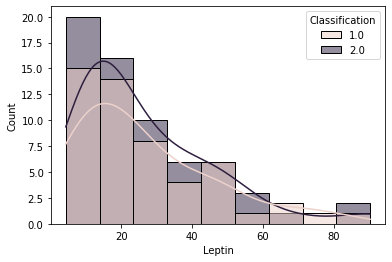

In [19]:
sns.histplot(data=df, x='Leptin', hue='Classification', kde=True)

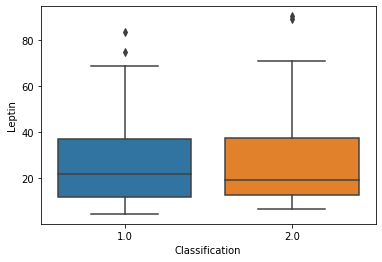

In [20]:
sns.boxplot(data=df, y='Leptin', x='Classification')

Adiponectin x CLASSIFICAÇÃO

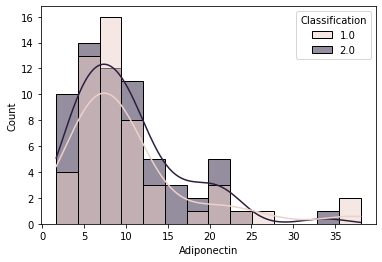

In [21]:
sns.histplot(data=df, x='Adiponectin', hue='Classification', kde=True)

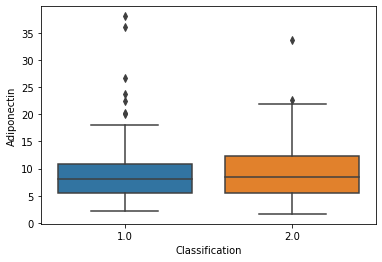

In [22]:
sns.boxplot(data=df, y='Adiponectin', x='Classification')

RESISTINA X CLASSIFICAÇÃO

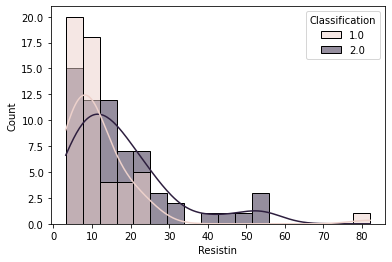

In [23]:
sns.histplot(data=df, x='Resistin', hue='Classification', kde=True)

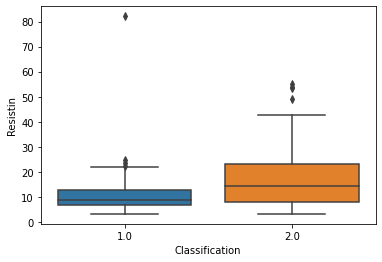

In [24]:
sns.boxplot(data=df, y='Resistin', x='Classification')

MCP-1 X CLASSIFICAÇÃO

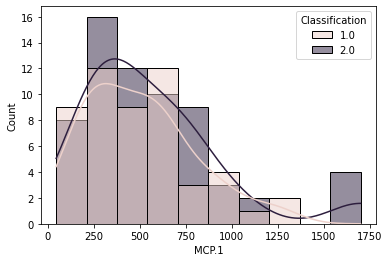

In [25]:
sns.histplot(data=df, x='MCP.1', hue='Classification', kde=True)

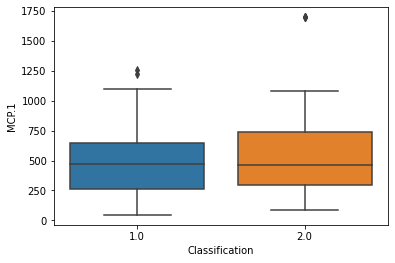

In [26]:
sns.boxplot(data=df, y='MCP.1', x='Classification')

In [27]:
# Aparentemente idade, IMC, glicose, insulina, HOMA e resistina podem ser variáveis chave...

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

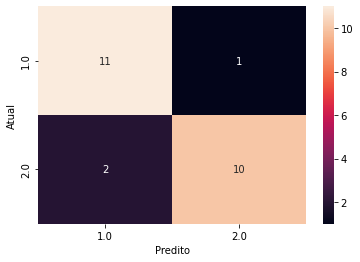

In [28]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X = df.drop('Classification', axis = 1) # Tirei a Classificação pois ela é a meta
y = df['Classification']

# Fiz a normalização dos dados
sc = StandardScaler()
X =  sc.fit_transform(X)
X

# Treinei o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Construí o modelo de regressão logística
r_logistica = LogisticRegression()
r_logistica.fit(X_train,y_train)
y_pred = r_logistica.predict(X_test)

#Criar a matriz de confusão
matriz_confusao = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])
sns.heatmap(matriz_confusao, annot=True)

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [29]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

X = sm.add_constant(X)
resultado = sm.OLS(y,X).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Classification   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.879
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.81e-05
Time:                        20:09:54   Log-Likelihood:                -63.465
No. Observations:                 116   AIC:                             146.9
Df Residuals:                     106   BIC:                             174.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5517      0.041     38.203      0.000       1.471       1.632
x1            -0.0452      0.044     -1.027      0.307      -0.132       0.042
x2            -0.1325      0.056     -2.371      0.020      -0.243      -0.022
x3             0.3091      0.070      4.443      0.000       0.171       0.447
x4             0.4503      0.143      3.142      0.002       0.166       0.734
x5            -0.4921      0.173     -2.840      0.005      -0.836      -0.149
x6            -0.0151      0.056     -0.270      0.788      -0.126       0.096
x7            -0.0118      0.046     -0.259      0.796      -0.102       0.079
x8             0.0954      0.047      2.021      0.046       0.002       0.189
x9             0.0060      0.048      0.124      0.901      -0.089       0.101
==============================================================================
Omnibus:                       33.935   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.454
Skew:                          -0.004   Prob(JB):                       0.0397
Kurtosis:                       1.844   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
cr = classification_report(y_test, y_pred)
print(cr)
print('-------------------------------------------------------------\n')
print("Acurácia Treino: ", r_logistica.score(X_train, y_train))
print("Acurácia Teste", r_logistica.score(X_test, y_test))

              precision    recall  f1-score   support

         1.0       0.85      0.92      0.88        12
         2.0       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

-------------------------------------------------------------

Acurácia Treino:  0.7608695652173914
Acurácia Teste 0.875


Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [31]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

r_logistica = LogisticRegression()
r_logistica.fit(X_train,y_train)
y_pred = r_logistica.predict(X_test)

Coloque abaixo a matriz de confusão do modelo feito:

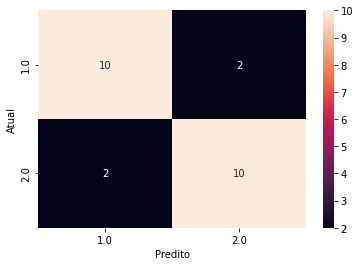

In [32]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

matriz_confusao = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])
sns.heatmap(matriz_confusao, annot=True)

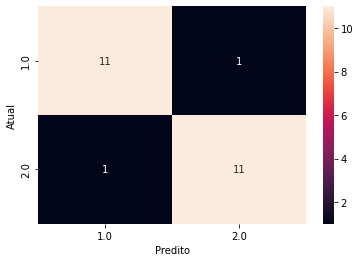

In [33]:
# Deicidi melhorar o modelo escolhendo variáveis específicas, o resultado foi:

X2 = df.drop(['Classification', 'Leptin', 'Age'],   axis = 1)
y2 = df['Classification']

sc2 = StandardScaler()
X2 =  sc.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

r_logistica2 = LogisticRegression()
r_logistica2.fit(X2_train,y2_train)
y2_pred = r_logistica2.predict(X2_test)

matriz_confusao2 = pd.crosstab(y2_test, y2_pred, rownames=['Atual'], colnames=['Predito'])
sns.heatmap(matriz_confusao2, annot=True)

In [34]:
cr2 = classification_report(y2_test, y2_pred)
print(cr2)
print('-------------------------------------------------------------\n')
print("Acurácia Treino: ", r_logistica2.score(X2_train, y2_train))
print("Acurácia Teste", r_logistica2.score(X2_test, y2_test))

ac = r_logistica2.score(X2_test, y2_test)

              precision    recall  f1-score   support

         1.0       0.92      0.92      0.92        12
         2.0       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24

-------------------------------------------------------------

Acurácia Treino:  0.7282608695652174
Acurácia Teste 0.9166666666666666


Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [35]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
print('acurácia: {:.2f}'.format(ac))
print('precisão: {}'.format('0.92'))
print('especificidade: {}'.format('__'))
print('sensitividade: {}'.format('__'))

acurácia: 0.92
precisão: 0.92
especificidade: __
sensitividade: __


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

Deu empate:

*   11 Verdadeiros Postivos
*   11 Verdadeiros Negativos
*   1 Falso Positivo
*   1 Falso Negativo

Com o Randon State em 10 o modelo piorou, com as mudanças que eu fiz, removendo as variáveis 'Classification', 'Leptin' e 'Age' pude obter um modelo mais preciso.

Infelizmente não consegui fazer a especificidade nem a sensitividade, que eram melhores métricas para garantir a validade do modelo.